# 数据科学
## 数据科学问题解决流程  workflow stage
1. 问题定义
1. 获取训练和测试数据
1. 数据清洗 预处理
1. 分析数据
1. 建模 预测 解决问题
1. 可视化解决问题流程
1. 提交结果到Kaggle


## workflow 七大目标
数据科学workflow解决七大问题
1. 分类 
1. 相关性 发现特征和结果之前的相关性 或者发现特征之前的相关性
1. 转换 建模阶段根据模型的不同可能需要将特征转换成数字类
1. 处理补全缺失值 数据预处理需要预估某个特征缺失值得影响
1. 校正 校正特征对结果的影响 如果发现特征对结果没有影响可以丢弃掉该特征
1. 生成新特征 可以通过已有的特征生成新的更加完善的特征
1. 根据数据的本质和解决目标选择合适的可视化工具来可视化

## 最佳实践
1. 尽早进行特征相关性的分析
1. 多用表象表格去提高代码的可读性

# Code

In [1]:
# 数据分析和预处理
import pandas as pd
import numpy as np
import random as rnd
# 数据可视化
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 机器学习算法
from sklearn.linear_model import LogisticRegression # logstic回归
from sklearn.linear_model import Perceptron  # 感知机
from sklearn.linear_model import SGDClassifier # 随机梯度下降
from sklearn.svm import SVC,LinearSVC   # svm 
from sklearn.ensemble import RandomForestClassifier # 随机森林
from sklearn.neighbors import KNeighborsClassifier  # KNN分类
from sklearn.naive_bayes import GaussianNB  # 朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier # 决策树

## 获取数据

In [2]:
train_df = pd.read_csv('./input/titanic/train.csv')
test_df = pd.read_csv('./input/titanic/test.csv')
combine = [train_df,test_df]

## 分析数据

### 数据中有哪些特征

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### 哪些特征是类别化(categorical)
类别化的特征包含名词性的,序数性的,比率和区间性的,这里类别化的特征包含生成 性别 embark 序数化的有Pclass

### 哪些特征是数字型的
数字型的特征是离散型 连续性 时间序列型 
数字型的例如age fare 离散型的有 sibsp parch

In [4]:
# 数据预览
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 哪些特征是混合型的
同一个特征里面既有数字又有字母的是混合型的特征是我们去校正处理的目标特征
ticket是数字和字母混合型的 Cabin是字母型的

### 哪些特征数据里有错误或者错别字
很难去review一个大的数据集,但是一般观察数据集的一小部门就能看出问题在哪哪些特征需要去校正
name 特征是比较随意的可能一个name里会包含头衔 括号 之类的

In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 哪些特征包含空值 null 或者没有值
这些特征需要校正


### 每个特征都是什么数据类型
查看每个特征的数据类型

In [6]:
# 查看数据集特征的数据类型
train_df.info()
print('='*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

### 数据集中数值类型的特征的分布
这帮助我们在早期从训练集中得出数据分布的规律
例如
总样本数是891是实际乘客的数量的40%
survied 是一个0 1 的类别型特征
...

train_df.describe()

### 类别型特征的分布
1. name 特征是unique的 没有重复
1. sex 特征有俩个可能的取值 0 和 1 男性占比65%
1. cabin 特征有重复值

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 根据数据分析得出相应的假设结论
1. 相关性
在项目的早期判断哪个特征和分类结果的相关性最强
1. 补全数据
有些关键的特征的缺失值需要去处理一下
1. 数据校正特征取舍
ticket特征有较高的重复性并且可能和最终的分类结果没有直接关系所以舍弃掉
cabin 特征因为较高的不完整性和空值过多也被舍弃
passengerid 因为没有直接的对结果产生贡献所以也舍弃掉
name 特征没有标准值并且对结果也贡献不大所以舍弃
1. 衍生新特征
可能会根据parch 和 sibsp 产生一个family的新特征
提取name特征产生新的特征
会对age fare 产生范围类的特征以供分析使用
1. 分类
我们根据特征判断新的假设
妇女 儿童 头等舱的人生还几率比较大




### 通过转换特征来验证假设和观察
为了验证我们的观察和假设可以通过转换特征来分析特征和分类之间的关联性 在这个阶段可以对没有空值得特征进行 也可以对类别型 序数型 离散型的特征进行分析
1. 我们观察到Pclass=1 和 survive有明显的相关性,所以特征工程选择pclass加入到最终的model里
1. sex 女性明显有更高的生存率 所以加入model
1. sibsp parch 和分类结果明显没有相关性 最好拿着这俩个字段衍生生成新的特征
 

In [8]:
# 分析Pclass和分类结果的相关性 结论 Pclass =1 时明显高 所以强相关性
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
# 分析sex 和 结果的相关性 
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Sex',ascending=False)

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [10]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### 可视化分析
用数据可视化来验证我们的假设
1. 数值类型特征的相关性可视化
类似age 一个区间范围的数据直方图可以很好的看出数据的分布
1. 观察直方图
大多age小于4的孩子活了下来 大于80的活了下来 15-25的死的最多 大部分乘客年龄在15-35
1. 结论
通过简单的看图分析得出结论 age应该在model里 补全age的缺失值 

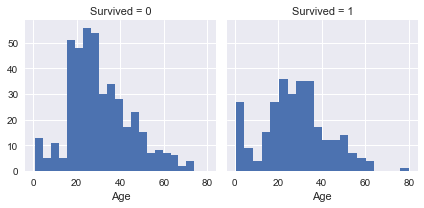

In [12]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

### 数值型和序数型的特征分析

#### 观察
1. Pclass=3有大多数的乘客而且大多数没有生还
1. 大多数pclass=2 3 的小孩都活了下来
1. 大多数pclass=1的活了下来
#### 结论
pclass加入model


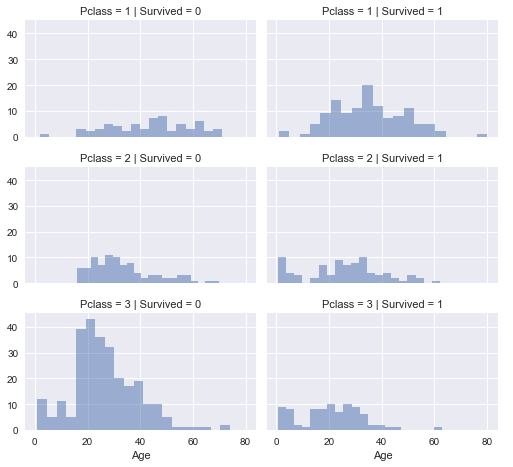

In [13]:
grid = sns.FacetGrid(train_df,col='Survived',row='Pclass',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',bins=20,alpha=.5)
grid.add_legend()

### 分析类别型特征的关联性
#### 观察
1. 女性乘客有更好的生存率
1. Pclass=3的男性比其他pclass有更高的生存率
#### 结论
将sex特征加入model
补全embarked

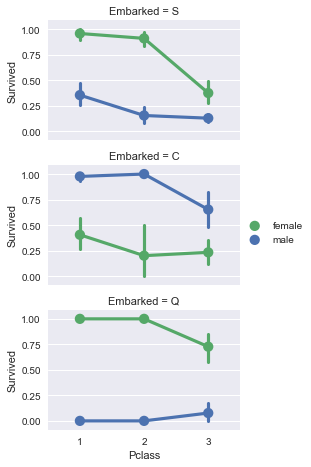

In [14]:
grid = sns.FacetGrid(train_df,row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

### 关联类别型特征和数值 型特征
可以关联类别型和数值型的特征
#### 观察
fare更高的乘客有更高的生还率 
#### 结论
考虑fare分段

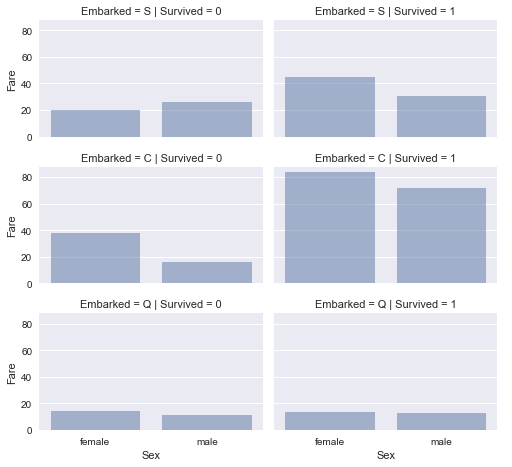

In [15]:
grid = sns.FacetGrid(train_df,row='Embarked',col='Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)
grid.add_legend()

### Wrangle data
目前为止我们已经有了好多的假设和结论,但是我们并没有改变特征的值

#### 通过舍弃特征校正数据
丢弃一些无用的特征,这样我们处理的数据更少,加速我们的notebook和分析 根据分析和假设我们丢弃cabin ticket 特征
注意在训练集和测试集上保持数据的一致性要丢弃都丢弃

In [16]:
print('before',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)
train_df = train_df.drop(['Cabin','Ticket'],axis=1)
test_df = test_df.drop(['Cabin','Ticket'],axis=1)
combine = [train_df,test_df]
print('After',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


### 从已有特征中抽取新特征
name特征可以抽取出titles 用正则表达式去处理name 
#### 观察

#### 结论

In [17]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
combine[0].head()    
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
# 给绝大多数的title 一个更通用的名字 或者rare
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()    

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [19]:
# 把类别性的特征值处理成数值型
title_mapping = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [20]:
# 现在可以放心的删除掉name特征 passengerId也不需要
train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df = test_df.drop(['Name'],axis=1)
combine = [train_df,test_df]
train_df.shape,test_df.shape

((891, 9), (418, 9))

### 转换类别型特征
现在我们可以把包含字符串的特征转换成数值型的,这是大部分的算法模型需要的

In [21]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)
train_df.head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### 完善数值连续型特征
现在处理有缺失值或者空值的特征,首先处理age特征 考虑三种方法:
1. 考虑生成一个均值和标准差之间的随机数
1. 

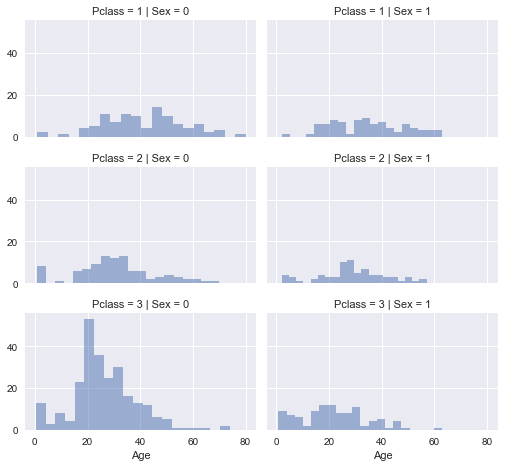

In [22]:
grid = sns.FacetGrid(train_df,row='Pclass',col='Sex',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

In [23]:
# 准备一个空数组存储guess的age
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [24]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)       
train_df.head()        

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [25]:
# 创建age 段并且判断和survived之间的相关性
train_df['AgeBand'] = pd.cut(train_df['Age'],5)
train_df[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.412037
1,"(16.0, 32.0]",0.337374
4,"(64.0, 80.0]",0.090909


In [26]:
# 将age转换成代表年龄段的序数
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16,'Age'] = 0
    dataset.loc[(dataset['Age'] > 16 ) & (dataset['Age'] <= 32),'Age'] = 1
    dataset.loc[(dataset['Age'] > 32 ) & (dataset['Age'] <= 48),'Age'] = 2
    dataset.loc[(dataset['Age'] > 48 ) & (dataset['Age'] <= 60),'Age'] = 3
    dataset.loc[dataset['Age'] > 64 ,'Age'] = 4
train_df.head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [27]:
# 移除AgeBand
train_df = train_df.drop(['AgeBand'],axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1



### 组合现有特征生成新特征
整合Parch 和 SibSp 生成新的特征


In [28]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)    

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [29]:
# 可以生成另一个IsAlone的特征
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1,'IsAlone'] = 1
train_df[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean().sort_values(by='Survived',ascending=False)       

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [30]:
# 剔除parch sibsp familysize 等特征 只留下IsAlone
train_df = train_df.drop(['Parch','SibSp','FamilySize'],axis=1)
test_df = test_df.drop(['Parch','SibSp','FamilySize'],axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [31]:
# 可以组合age和class生成一个新的特征
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
train_df.loc[:,['Age*Class','Age','Pclass']].head(10)    

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### 完善一个类别型的特征
Embarked 特征含有S Q C 等值 我们的训练集有俩个缺失 需要简单的去填充他们

In [32]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [33]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)   

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### 转换类别型特征为数值型


In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
train_df.head()       

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### 快速完善特征和转换特征

In [35]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,62,9.6875,2,1,1,124
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [36]:
# 创建fare段
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


### 转换段特征值为序数型

In [37]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [38]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,62,1,2,1,1,124
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


# 建模 预测 和 评估
## 建模思路
现在可以开始建模预测了,并且评估模型的效果,目前机器学习有60+个模型, 首先我们应该理解问题的本质才能窄化算法的选择范围,这里是一个二分类或者回归问题,所以可以选择一些算法如下:
1. Logistic 回归
1. KNN
1. SVM
1. 朴素贝叶斯
1. 决策树
1. 随机森林
1. 感知机
1. Artificial Neural network
1. RVM 

In [39]:
X_train = train_df.drop('Survived',axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId',axis=1).copy()
X_train.shape,Y_train.shape,X_test.shape

((891, 8), (891,), (418, 8))

## Logistic 回归
该算法在workflow的早期非常有用

In [40]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
print(Y_pred)
print('='*10)
print(logreg.score(X_train,Y_train))
acc_log = round(logreg.score(X_train,Y_train)*100,2)
print(acc_log)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
0.778900112233
77.89


我们可以使用Logistic Regression来验证我们的假设和结论,可以通过特征的系数来观察
整的系数增加可能性,负的系数减少可能性
1. sex 是正系数最高的特征 这意味着sex的值增加提高生存率最高
1. Pclass减少 Survived = 1的可能性降低
1. Age*class是一个好的特征因为他是第二高的负相关
1. Title是deerga

In [41]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns=['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
1,Sex,2.178438
5,Title,0.404208
4,Embarked,0.299635
6,IsAlone,0.052734
7,Age*Class,0.021227
3,Fare,-0.024000
2,Age,-0.044152
0,Pclass,-1.004042


### SVM
下个model使用SVM,另一个监督学习的模型

In [42]:
svc = SVC()
svc.fit(X_train,Y_train)
Y_predict = svc.predict(X_test)
print(Y_predict)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
acc_svc

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


83.609999999999999

### KNN
下一个model是KNN 在模式识别领域 KNN是用来分类和回归的非参数方法
KNN的表现比Logistic Regression要好 比SVM要差

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_predict = knn.predict(X_test)
print(Y_predict)
acc_knn = round(knn.score(X_train,Y_train)*100,2)
acc_knn

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1
 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0
 1 1 1 1 1 0 0 1 0 0 1]


83.159999999999997

### 朴素贝叶斯
在机器学习领域 朴素贝叶斯分类器是对朴素贝叶斯理论的应用里面的一直 朴素贝叶斯性能很高
朴素贝叶斯的结果是目前为止最差的

In [44]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_predict = nb.predict(X_test)
print(Y_predict)
acc_nb = round(nb.score(X_train,Y_train)*100,2)
acc_nb

[0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 1]


76.989999999999995

### 感知机
感知机是监督学习力的一个二分类分类器 是线性分类的一直算法 该算法支持在线学习是一种在线算法

In [45]:
perceptron = Perceptron()
perceptron.fit(X_train,Y_train)
Y_predict = perceptron.predict(X_test)
print(Y_predict)
acc_perc = round(perceptron.score(X_train,Y_train)*100,2)
acc_perc

[0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0]


77.329999999999998

In [46]:
# linear_svc
linear_svc = LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_predict = linear_svc.predict(X_test)
print(Y_predict)
acc_lsvc = round(linear_svc.score(X_train,Y_train)*100,2)
acc_lsvc

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


78.340000000000003

In [47]:
# SGD
sgd = SGDClassifier()
sgd.fit(X_train,Y_train)
Y_predict=  sgd.predict(X_test)
print(Y_predict)
acc_sgd = round(sgd.score(X_train,Y_train)*100,2)
acc_sgd

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


79.349999999999994

### 决策树
决策树算法是目前为止表现最好的

In [48]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_predict=  decision_tree.predict(X_test)
print(Y_predict)
acc_dt = round(decision_tree.score(X_train,Y_train)*100,2)
acc_dt

[0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 1]


86.760000000000005

### 随机森林
随机森林是目前最流行的分类算法  也是目前表现最好的 所以选定随机森林

In [49]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_predict=  random_forest.predict(X_test)
print(Y_predict)
acc_rf = round(random_forest.score(X_train,Y_train)*100,2)
acc_rf

[0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 1]


86.760000000000005

## 模型评测
现在对各个model的结果进行排名 决策树和随机森林的结果相同 但是考虑到过拟合问题选择随机森林

In [50]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_rf, acc_nb, acc_perc, 
              acc_sgd, acc_lsvc, acc_dt]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
0,Support Vector Machines,83.61
1,KNN,83.16
6,Stochastic Gradient Decent,79.35
7,Linear SVC,78.34
2,Logistic Regression,77.89
5,Perceptron,77.33
4,Naive Bayes,76.99
